In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [3]:
def download_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data = data[['Close']]
    return data

In [4]:
ticker = 'TATASTEEL.NS'  
start_date = '2020-01-01'
end_date = '2024-07-07'
data = download_stock_data(ticker, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [6]:
time_step = 60
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [7]:
# Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# Train the model
model.fit(X_train, Y_train, batch_size=1, epochs=5)

Epoch 1/5
832/832 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 5.6802e-04
Epoch 2/5
832/832 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 5.6087e-04
Epoch 3/5
832/832 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 4.6878e-04
Epoch 4/5
832/832 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 3.9464e-04
Epoch 5/5
832/832 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 4.3732e-04


In [15]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [17]:
# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(Y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(Y_test, test_predict))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 98.55535601663287
Test RMSE: 147.50764509195466


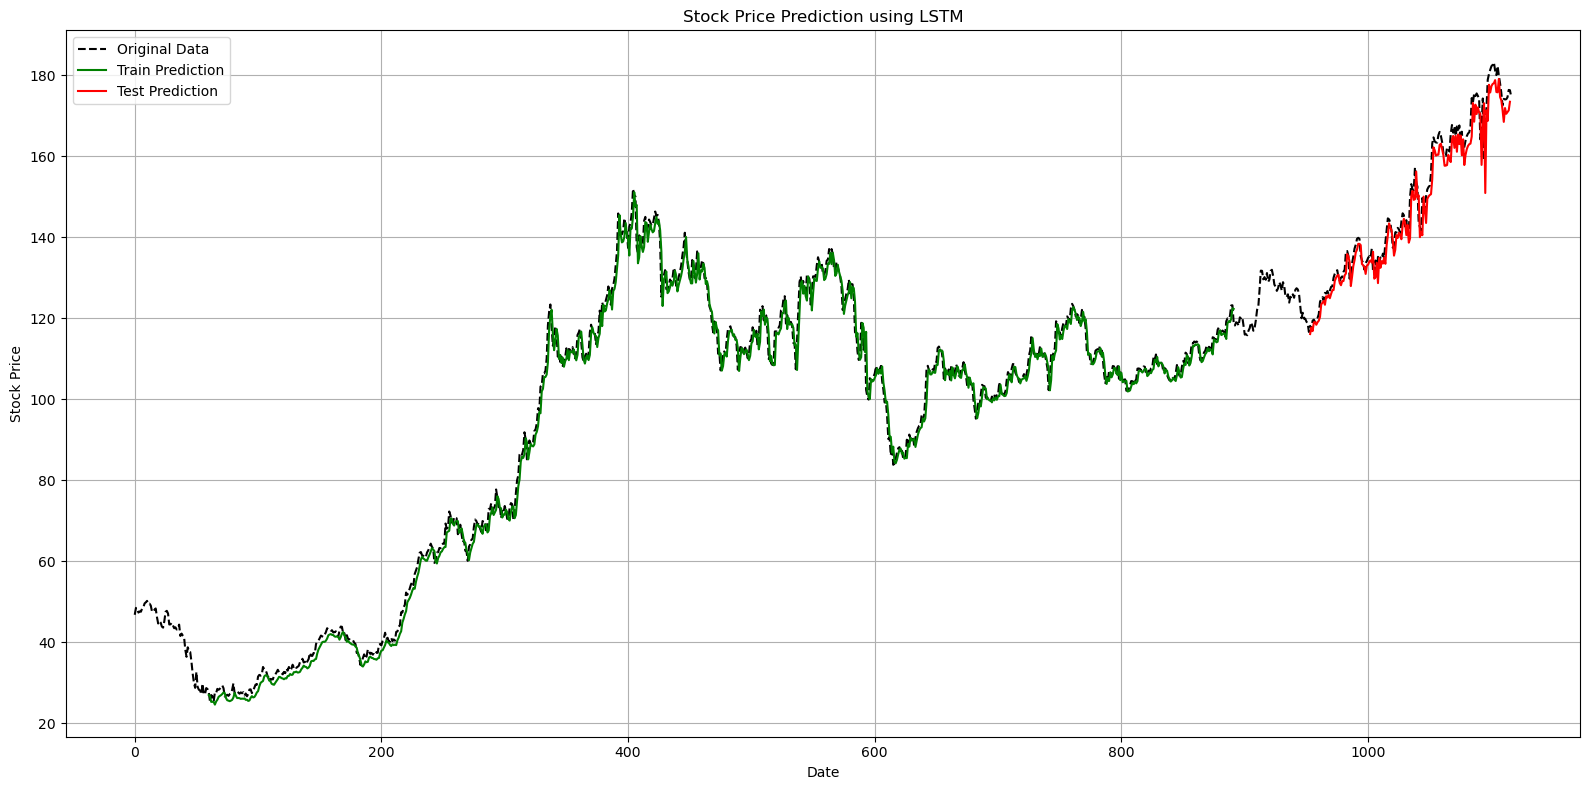

In [18]:
# Plot results
# Shift train predictions for plotting
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict)+time_step, :] = train_predict

# Shift test predictions for plotting
test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
test_plot[len(train_predict)+(time_step*2)+1:len(scaled_data)-1, :] = test_predict

# Enhanced Plotting
plt.figure(figsize=(16,8))
plt.plot(scaler.inverse_transform(scaled_data), label='Original Data', color='black', linestyle='--')
plt.plot(train_plot, label='Train Prediction', color='green', linestyle='-')
plt.plot(test_plot, label='Test Prediction', color='red', linestyle='-')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

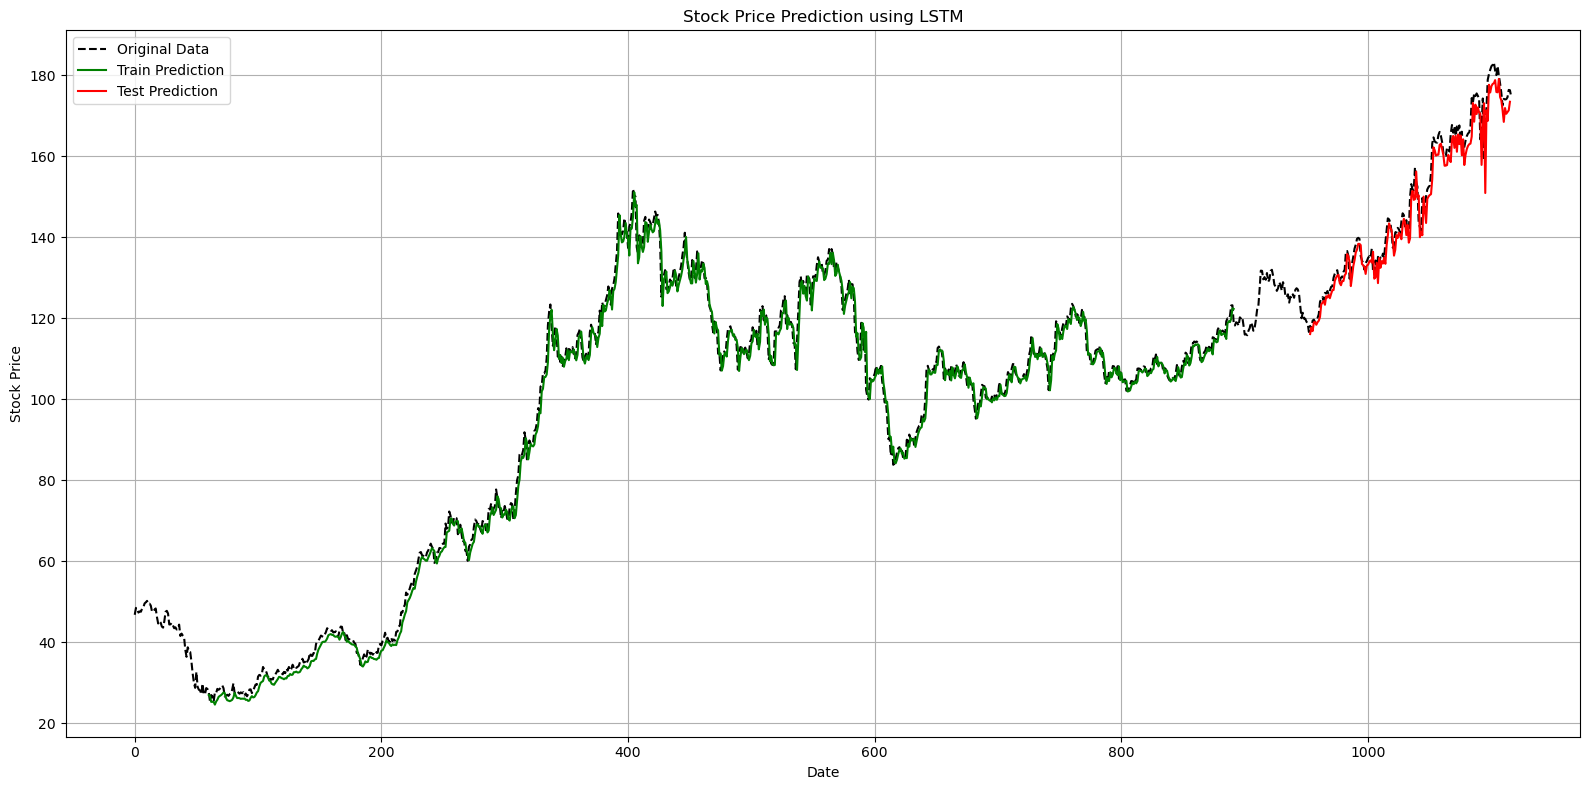

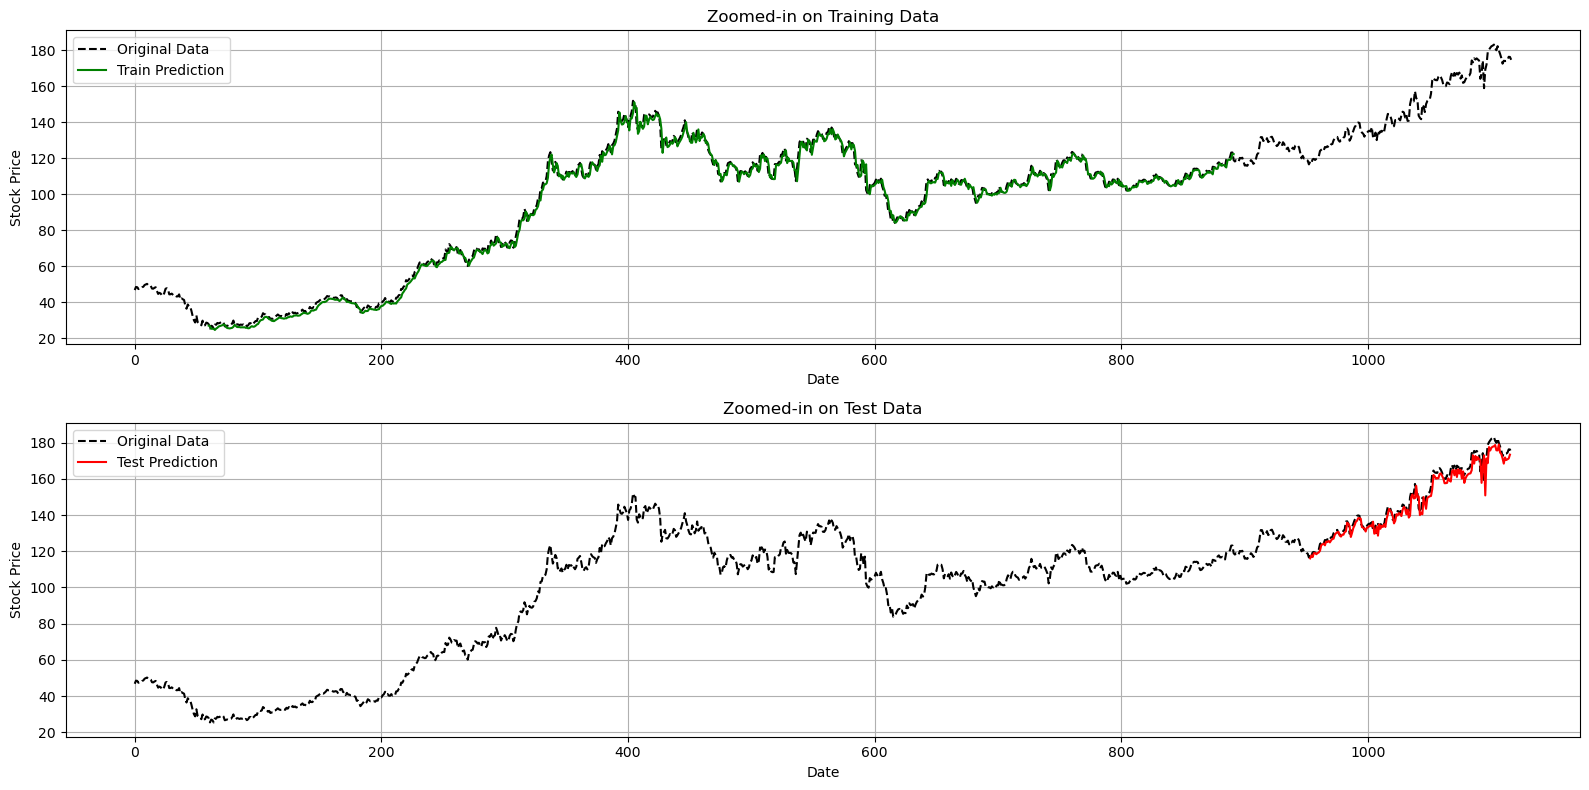

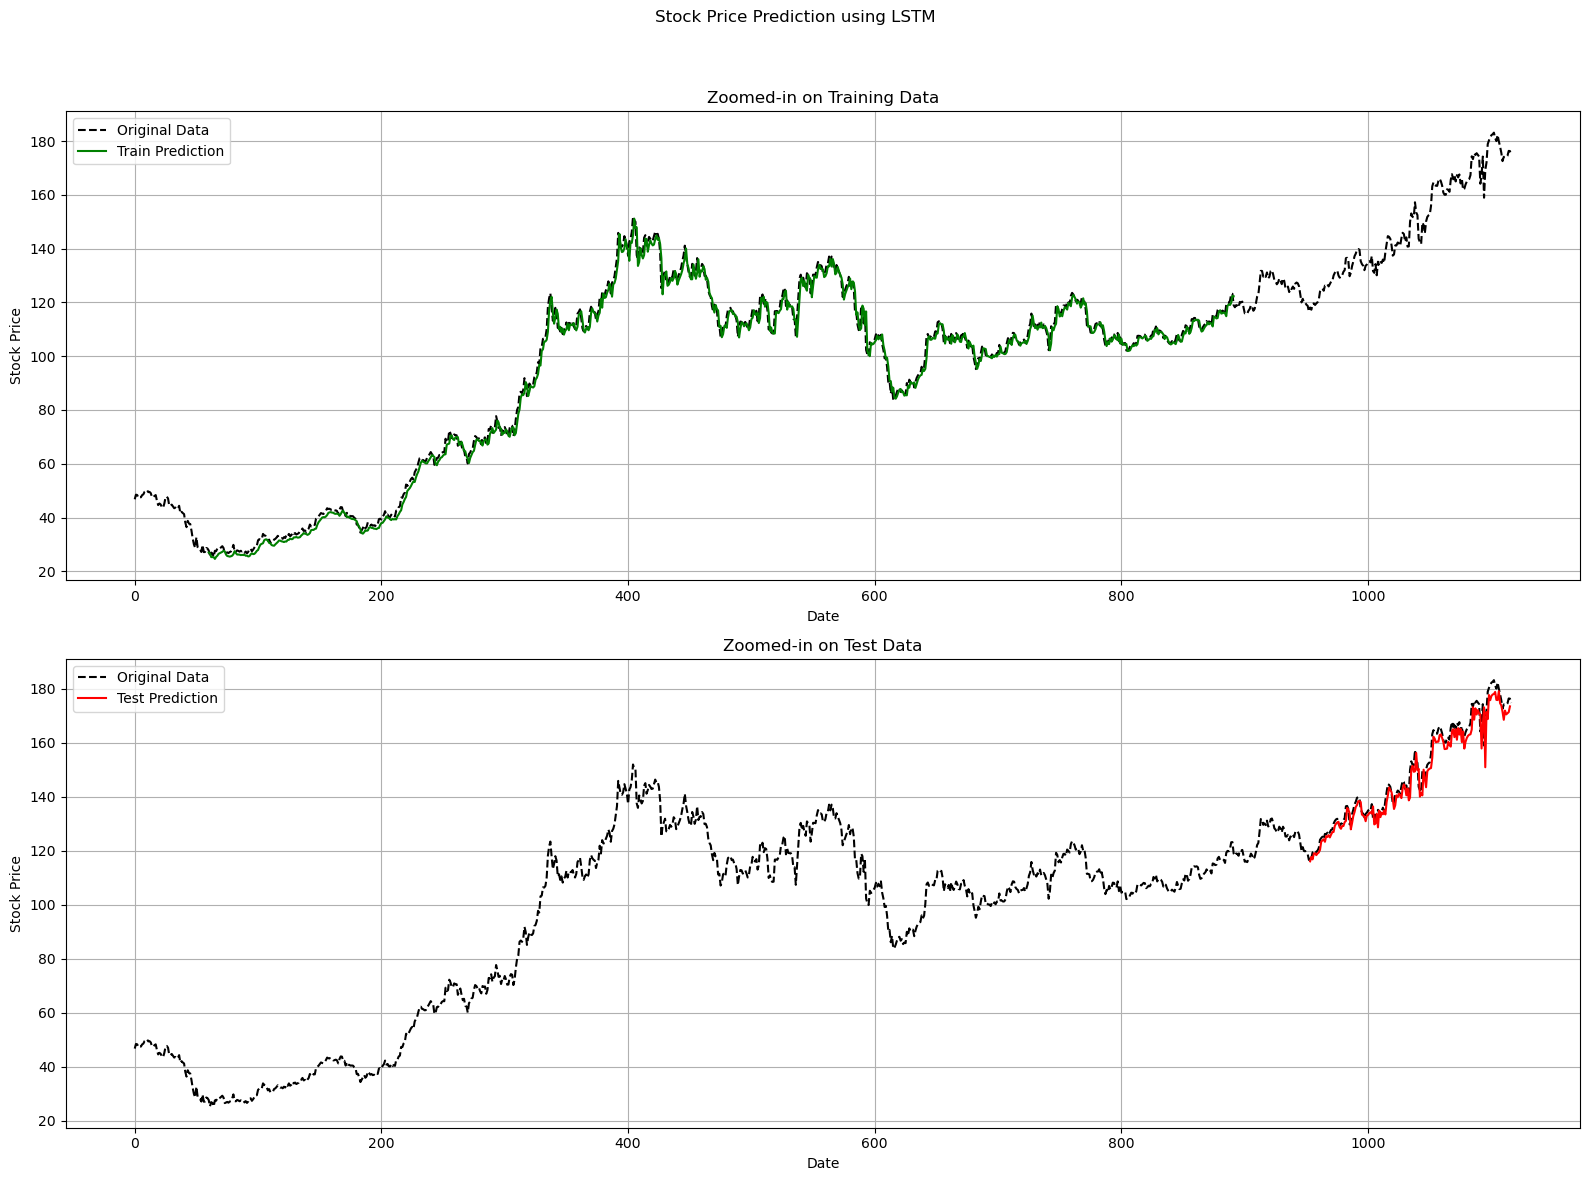

In [19]:
# Plot results
# Shift train predictions for plotting
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict)+time_step, :] = train_predict

# Shift test predictions for plotting
test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
test_plot[len(train_predict)+(time_step*2)+1:len(scaled_data)-1, :] = test_predict

# Enhanced Plotting
plt.figure(figsize=(16,8))
plt.plot(scaler.inverse_transform(scaled_data), label='Original Data', color='black', linestyle='--')
plt.plot(train_plot, label='Train Prediction', color='green', linestyle='-')
plt.plot(test_plot, label='Test Prediction', color='red', linestyle='-')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Zoomed-in visualization
plt.figure(figsize=(16,8))
plt.subplot(2, 1, 1)
plt.plot(scaler.inverse_transform(scaled_data), label='Original Data', color='black', linestyle='--')
plt.plot(train_plot, label='Train Prediction', color='green', linestyle='-')
plt.title('Zoomed-in on Training Data')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(scaler.inverse_transform(scaled_data), label='Original Data', color='black', linestyle='--')
plt.plot(test_plot, label='Test Prediction', color='red', linestyle='-')
plt.title('Zoomed-in on Test Data')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Combined plot with zoomed-in regions
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))
fig.suptitle('Stock Price Prediction using LSTM')

ax1.plot(scaler.inverse_transform(scaled_data), label='Original Data', color='black', linestyle='--')
ax1.plot(train_plot, label='Train Prediction', color='green', linestyle='-')
ax1.set_title('Zoomed-in on Training Data')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price')
ax1.legend()
ax1.grid(True)

ax2.plot(scaler.inverse_transform(scaled_data), label='Original Data', color='black', linestyle='--')
ax2.plot(test_plot, label='Test Prediction', color='red', linestyle='-')
ax2.set_title('Zoomed-in on Test Data')
ax2.set_xlabel('Date')
ax2.set_ylabel('Stock Price')
ax2.legend()
ax2.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()